<a href="https://colab.research.google.com/github/Yurovskyy/TP3/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import plotly.express as px

In [13]:
# @title Carregando o dataset

# URL do arquivo CSV
url = 'https://github.com/Yurovskyy/TP3/raw/main/output.csv'

# Baixar o arquivo CSV da web
response = requests.get(url)

# Verificar se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Ler o conteúdo do arquivo CSV usando o Pandas
    df = pd.read_csv(url)

# Se a solicitação não for bem-sucedida
else:
    print('Falha ao baixar o arquivo CSV.')


In [ ]:
# @title Exploração inicial do dataset

dimensoes = df.shape
print("Número de entradas(linhas):", dimensoes[0])
print("Número de colunas(variáveis):", dimensoes[1])

# identificar o tipo de cada variável
display(df.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(df.head())

Número de entradas(linhas): 4944
Número de colunas(variáveis): 14


Index       float64
firm          int64
BE          float64
ME          float64
ME.lag1     float64
r_i         float64
r.3.0       float64
r.12.4      float64
AC          float64
CA          float64
DR          float64
OFC         float64
ECI         float64
industry     object
dtype: object

Index  firm            BE            ME       ME.lag1       r_i  \
0  2020.75     1  1.179763e+09  1.217182e+09  1.200622e+09  0.089471   
1  2020.50     1  1.262906e+09  1.064582e+09  1.217182e+09 -0.013699   
2  2022.00     1  1.205650e+09  1.354615e+09  1.761918e+09  0.181542   
3  2021.25     1  1.190537e+09  1.312840e+09  1.064523e+09  0.267479   
4  2023.00     1  1.072554e+09  2.471660e+09  2.544702e+09  0.042154   

      r.3.0    r.12.4        AC        CA        DR       OFC       ECI  \
0 -0.013699 -0.618101  0.500000  0.694444  0.750000  0.433333  0.805556   
1  0.142185 -0.471392  0.500000  0.611111  0.750000  0.400000  0.833333   
2  0.259363  0.039740  0.527778  0.722222  0.750000  0.666667  0.833333   
3 -0.209721  0.217958  0.500000  0.694444  0.750000  0.433333  0.805556   
4  0.029124  0.337521  0.527778  0.888889  0.958333  0.766667  0.722222   

  industry  
0   Outros  
1   Outros  
2   Outros  
3   Outros  
4   Outros

In [ ]:
# @title Valores faltantes
# @markdown Como eu disse, não temos valores faltantes!

# ver a porcentagem valores faltantes
display((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

Index       0.0
firm        0.0
BE          0.0
ME          0.0
ME.lag1     0.0
r_i         0.0
r.3.0       0.0
r.12.4      0.0
AC          0.0
CA          0.0
DR          0.0
OFC         0.0
ECI         0.0
industry    0.0
dtype: float64

In [ ]:
# @title Descrição dos valores categóricos

display(df.describe(include=['O']))

industry
count      4944
unique       20
top      Outros
freq       1145

In [ ]:
fig = px.scatter(df,
                 x='ME',
                 y='r.12.4',
                 hover_data=["industry","firm"],
                 title="Market Value por Retorno Anual")

fig.show()

In [ ]:
fig = px.scatter(df,
                 x='industry',
                 y='r.12.4',
                 hover_data=["ME","firm"],
                 title="Tipo de industria por Retorno Anual")

fig.show()

In [ ]:
fig = px.scatter(df,
                 x='r.12.4',
                 y='CA',
                 hover_data=["industry","firm","ME"],
                 title="CA por Retorno Anual")

fig.show()

In [ ]:
fig = px.scatter(df,
                 x='r.12.4',
                 y='AC',
                 hover_data=["industry","firm","ME"],
                 title="AC por Retorno Anual")

fig.show()

In [ ]:
fig = px.scatter(df,
                 x='r.12.4',
                 y='DR',
                 hover_data=["industry","firm","ME"],
                 title="DR por Retorno Anual")

fig.show()

In [ ]:
fig = px.scatter(df,
                 x='r.12.4',
                 y='OFC',
                 hover_data=["industry","firm","ME"],
                 title="OFC por Retorno Anual")

fig.show()

In [ ]:
fig = px.scatter(df,
                 x='r.12.4',
                 y='ECI',
                 hover_data=["industry","firm","ME"],
                 title="ECI por Retorno Anual")

fig.show()

In [ ]:
fig = px.histogram(df, x='r.12.4', title='Histograma dos valores')
fig.show()

In [ ]:
display(df.describe())

Index         firm            BE            ME       ME.lag1  \
count  4944.000000  4944.000000  4.944000e+03  4.944000e+03  4.944000e+03   
mean   2021.700496   418.813714  9.244580e+09  1.647379e+10  1.655128e+10   
std       1.326880   245.360361  2.990092e+10  4.501468e+10  4.522360e+10   
min    2019.000000     1.000000  5.600000e+04  1.597143e+06  1.597557e+06   
25%    2020.500000   209.000000  7.253755e+08  8.281819e+08  8.229385e+08   
50%    2021.750000   405.000000  1.794868e+09  3.431592e+09  3.423414e+09   
75%    2022.750000   622.000000  6.121884e+09  1.161053e+10  1.183215e+10   
max    2023.750000   860.000000  4.341940e+11  5.705210e+11  5.705210e+11   

               r_i        r.3.0       r.12.4           AC           CA  \
count  4944.000000  4944.000000  4944.000000  4944.000000  4944.000000   
mean      0.003556     0.003051     0.017635     0.528727     0.781031   
std       0.275630     0.276638     0.441591     0.148566     0.130017   
min      -2.266958    -1.392217    -1.960695     0.194444     0.361111   
25%      -0.121592    -0.126219    -0.211830     0.416667     0.694444   
50%       0.012751     0.009830     0.021291     0.527778     0.805556   
75%       0.148643     0.151809     0.254705     0.638889     0.888889   
max       1.516664     1.516664     5.134580     0.833333     1.000000   

                DR          OFC          ECI  
count  4944.000000  4944.000000  4944.000000  
mean      0.845292     0.710720     0.764979  
std       0.135652     0.165161     0.139815  
min       0.333333     0.233333     0.305556  
25%       0.791667     0.600000     0.694444  
50%       0.875000     0.733333     0.777778  
75%       0.958333     0.833333     0.861111  
max       1.000000     1.000000     1.000000

In [14]:
df = df.drop(columns=["industry"])

In [15]:
scaler = StandardScaler()
values = scaler.fit_transform(df[["AC","CA","DR","OFC","ECI"]])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(values)

fig = px.scatter(df, x='Index', y='r.12.4', color='Cluster', hover_data=["Index","firm","BE","ME","r.12.4","AC","CA","DR","OFC","ECI"], title='Clusterização')
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [8]:

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df)

fig = px.scatter(X_reduced, x=0, y=1, color=df["Cluster"].astype(str), title="Clusterização com KMeans")
fig.show()

In [9]:
# Converter X_reduced para DataFrame e adicionar colunas originais
df_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_reduced["Cluster"] = df["Cluster"].astype(str)
df_reduced["Index"] = df.index
df_reduced["firm"] = df["firm"]
df_reduced["BE"] = df["BE"]
df_reduced["ME"] = df["ME"]
df_reduced["r.12.4"] = df["r.12.4"]
df_reduced["AC"] = df["AC"]
df_reduced["CA"] = df["CA"]
df_reduced["DR"] = df["DR"]
df_reduced["OFC"] = df["OFC"]
df_reduced["ECI"] = df["ECI"]

# Gerar o gráfico com hover_data
fig = px.scatter(
    df_reduced, x='PC1', y='PC2', color="Cluster",
    hover_data=["Index", "firm", "BE", "ME", "r.12.4", "AC", "CA", "DR", "OFC", "ECI"],
    title="Clusterização com KMeans"
)
fig.show()

In [10]:
for cluster in df_reduced["Cluster"].unique():
    print(f"Resumo estatístico do Cluster {cluster}:")
    display(df_reduced[df_reduced["Cluster"] == cluster].describe())
    print("\n" + "="*50 + "\n")

Resumo estatístico do Cluster 1:


PC1           PC2        Index         firm            BE  \
count  2.294000e+03  2.294000e+03  2294.000000  2294.000000  2.294000e+03   
mean  -1.075719e+10  8.204402e+07  2381.174368   402.612031  5.024642e+09   
std    2.719227e+10  5.426819e+09  1371.728380   235.271875  1.023479e+10   
min   -2.509885e+10 -4.790138e+10     0.000000     1.000000  3.790000e+05   
25%   -2.356406e+10 -4.145598e+08  1187.250000   199.000000  8.305442e+08   
50%   -2.000514e+10  8.486337e+08  2340.500000   388.000000  1.629808e+09   
75%   -1.042364e+10  1.426202e+09  3483.750000   581.000000  4.927228e+09   
max    2.333319e+11  2.790542e+10  4943.000000   860.000000  7.368309e+10   

                 ME       r.12.4           AC           CA           DR  \
count  2.294000e+03  2294.000000  2294.000000  2294.000000  2294.000000   
mean   9.467866e+09     0.007867     0.485082     0.761152     0.847628   
std    1.827669e+10     0.430005     0.118844     0.077830     0.088519   
min    1.597143e+06    -1.817558     0.194444     0.583333     0.500000   
25%    8.879707e+08    -0.213815     0.388889     0.722222     0.791667   
50%    3.156375e+09     0.005846     0.472222     0.750000     0.833333   
75%    9.540156e+09     0.240772     0.583333     0.805556     0.916667   
max    1.829543e+11     2.284861     0.777778     1.000000     1.000000   

               OFC          ECI  
count  2294.000000  2294.000000  
mean      0.682040     0.763368  
std       0.124103     0.090209  
min       0.333333     0.500000  
25%       0.600000     0.694444  
50%       0.700000     0.777778  
75%       0.766667     0.833333  
max       0.966667     1.000000



Resumo estatístico do Cluster 0:


PC1           PC2        Index         firm            BE  \
count  1.815000e+03  1.815000e+03  1815.000000  1815.000000  1.815000e+03   
mean   2.372173e+10 -4.218331e+08  2557.601102   434.088154  1.832942e+10   
std    1.053007e+11  2.002069e+10  1489.788042   256.736015  4.654807e+10   
min   -2.509053e+10 -1.116768e+11     4.000000     1.000000  5.600000e+04   
25%   -2.129830e+10 -2.187573e+09  1239.500000   209.000000  1.323678e+09   
50%   -1.343660e+10  8.793162e+08  2744.000000   454.000000  4.363126e+09   
75%    1.273278e+10  2.472370e+09  3843.500000   650.000000  1.091273e+10   
max    7.535930e+11  1.634050e+11  4935.000000   860.000000  4.341940e+11   

                 ME       r.12.4           AC           CA           DR  \
count  1.815000e+03  1815.000000  1815.000000  1815.000000  1815.000000   
mean   3.198017e+10    -0.017590     0.642332     0.895898     0.940794   
std    6.852016e+10     0.436821     0.113503     0.067092     0.066108   
min    6.094790e+06    -1.960695     0.305556     0.666667     0.708333   
25%    2.281246e+09    -0.246980     0.555556     0.833333     0.916667   
50%    7.221473e+09     0.007752     0.666667     0.888889     0.958333   
75%    2.539286e+10     0.236046     0.750000     0.944444     1.000000   
max    5.705210e+11     1.872125     0.833333     1.000000     1.000000   

               OFC          ECI  
count  1815.000000  1815.000000  
mean      0.843710     0.864754  
std       0.091903     0.075982  
min       0.566667     0.611111  
25%       0.800000     0.819444  
50%       0.866667     0.861111  
75%       0.900000     0.916667  
max       1.000000     1.000000



Resumo estatístico do Cluster 2:


PC1           PC2        Index        firm            BE  \
count  8.350000e+02  8.350000e+02   835.000000  835.000000  8.350000e+02   
mean  -2.200953e+10  6.915186e+08  2532.498204  430.123353  1.090756e+09   
std    5.122127e+09  1.192928e+09  1425.436953  244.737530  1.755001e+09   
min   -2.508968e+10 -1.268995e+10   181.000000   29.000000  2.320000e+05   
25%   -2.471547e+10  6.645029e+08  1379.500000  242.000000  1.603675e+08   
50%   -2.401293e+10  8.483385e+08  2415.000000  399.000000  5.193734e+08   
75%   -2.193902e+10  1.022025e+09  3781.500000  643.000000  1.272914e+09   
max    2.323480e+10  6.854908e+09  4906.000000  855.000000  1.548351e+10   

                 ME      r.12.4          AC          CA          DR  \
count  8.350000e+02  835.000000  835.000000  835.000000  835.000000   
mean   2.015728e+09    0.121039    0.401697    0.585961    0.631287   
std    3.437499e+09    0.467634    0.120335    0.076452    0.110889   
min    4.231305e+06   -1.280934    0.222222    0.361111    0.333333   
25%    2.350186e+08   -0.126346    0.305556    0.527778    0.583333   
50%    5.902200e+08    0.085569    0.388889    0.583333    0.625000   
75%    2.097821e+09    0.346233    0.500000    0.638889    0.708333   
max    3.484827e+10    5.134580    0.694444    0.777778    1.000000   

              OFC         ECI  
count  835.000000  835.000000  
mean     0.500439    0.552528  
std      0.126234    0.118607  
min      0.233333    0.305556  
25%      0.400000    0.472222  
50%      0.466667    0.555556  
75%      0.600000    0.638889  
max      0.866667    0.861111

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

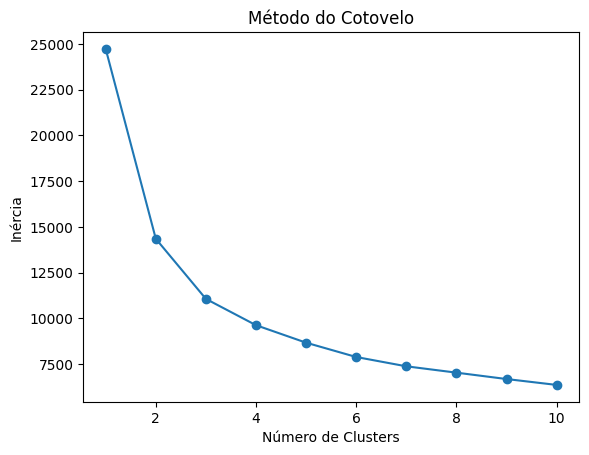

In [6]:
# Lista para armazenar as inertias
inertias = []

# Testar diferentes números de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(values)  # 'values' definido no seu código original
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

# Testar diferentes números de clusters
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(values)  # 'values' definido no seu código original

    silhouette_avg = silhouette_score(values, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, a pontuação média da silhueta é: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 2, a pontuação média da silhueta é: 0.36629659988263974


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 3, a pontuação média da silhueta é: 0.2746433068523762


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 4, a pontuação média da silhueta é: 0.26441883193240145


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 5, a pontuação média da silhueta é: 0.232282395458886


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 6, a pontuação média da silhueta é: 0.2333934991673995


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 7, a pontuação média da silhueta é: 0.22604839818994044


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 8, a pontuação média da silhueta é: 0.2138430500639582


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 9, a pontuação média da silhueta é: 0.20339201332470389


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 10, a pontuação média da silhueta é: 0.20481178359285232


In [17]:

from sklearn.metrics import calinski_harabasz_score

# Testar diferentes números de clusters
# Índice de Calinski-Harabasz: Mede a razão entre a dispersão entre clusters e
# a dispersão dentro dos clusters. Valores mais altos indicam melhor clusterização.
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(values)  # 'values' definido no seu código original

    ch_index = calinski_harabasz_score(values, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, o índice Calinski-Harabasz é: {ch_index}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 2, o índice Calinski-Harabasz é: 3570.8494791472235
Para n_clusters = 3, o índice Calinski-Harabasz é: 3047.743906745505
Para n_clusters = 4, o índice Calinski-Harabasz é: 2579.7636184953744


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 5, o índice Calinski-Harabasz é: 2283.6115345843427
Para n_clusters = 6, o índice Calinski-Harabasz é: 2105.2494563616337


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 7, o índice Calinski-Harabasz é: 1931.4508083431606
Para n_clusters = 8, o índice Calinski-Harabasz é: 1771.275776188942


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para n_clusters = 9, o índice Calinski-Harabasz é: 1662.374517353871
Para n_clusters = 10, o índice Calinski-Harabasz é: 1579.7070916848297


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

